In [23]:
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import uniform
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [24]:
iso_theta_fn = "iso_theta.txt"
iso_eta_fn = "iso_eta.txt"
full_theta_fn = "full_theta.txt"
full_eta_fn = "full_eta.txt"

In [25]:
with open(iso_theta_fn, 'r') as iso_theta_file:
    iso_theta = json.load(iso_theta_file)
with open(iso_eta_fn, 'r') as iso_eta_file:
    iso_eta = json.load(iso_eta_file)
with open(full_theta_fn, 'r') as full_theta_file:
    full_theta = json.load(full_theta_file)
with open(full_eta_fn, 'r') as full_eta_file:
    full_eta = json.load(full_eta_file)

In [26]:
def hellinger(p, q):
    he_sq = 1 - np.sum(np.sqrt(p)*np.sqrt(q))
    return he_sq

In [27]:
def Bhattacharyya(p, q):
    BC = np.sum(np.sqrt(p)*np.sqrt(q))
    if BC == 0:
        Bha = -np.log(10**-4)
    else:
        Bha = -np.log(np.sum(np.sqrt(p)*np.sqrt(q)))
    return Bha

In [28]:
def get_he_dist(iso_theta_dist, iso_eta_dist, full_theta_dist, full_eta_dist, theta_he_dist, eta_he_dist):
    theta_he_dist = {}
    eta_he_dist = {}
    
#     iso_theta_out[7].sort()
#     return iso_theta_out
#     return type(np.sum(np.asarray(iso_theta_out[7].sort()), np.asarray(full_theta_out[7].sort())))
    
    for i in iso_theta_dist:
        theta_he_dist[i] = hellinger(np.asarray(iso_theta_dist[i]), np.asarray(full_theta_dist[i]))
    for i in iso_eta_dist:
        eta_he_dist[i] = hellinger(np.asarray(iso_eta_dist[i]), np.asarray(full_eta_dist[i]))
        
    return (theta_he_dist, eta_he_dist)

In [29]:
def get_dist(function, iso_theta_dist, iso_eta_dist, full_theta_dist, full_eta_dist, theta_dist, eta_dist):
    theta_dist = {}
    eta_dist = {}
    
    for i in iso_theta_dist:
        if i in full_theta_dist:
            theta_dist[i] = function(np.asarray(iso_theta_dist[i]), np.asarray(full_theta_dist[i]))
    for i in iso_eta_dist:
        if i in full_eta_dist:
            eta_dist[i] = function(np.asarray(iso_eta_dist[i]), np.asarray(full_eta_dist[i]))
        
    return (theta_dist, eta_dist)

In [30]:
def get_dist_from_flat(function, input_hist, out_hist):
    flat = np.full((1, 360), 1/360)
    out_hist = {}
    
    for i in input_hist:
        out_hist[i] = function(np.asarray(input_hist[i]), flat)
    return out_hist

In [31]:
def Gaussian(data):
    mean = np.average(data)
    variance = np.var(data)
    return mean, variance

In [32]:
def Bha_gauss(p, q):
    (mean_p, var_p) = Gaussian(p)
    (mean_q, var_q) = Gaussian(q)
    DB = (1/4)*np.log((1/4)*(var_p/var_q + var_q/var_p + 2)) + (1/4)*((mean_p - mean_q)**2/(var_p + var_q))
    return DB

In [33]:
def Hellinger_gauss(p, q):
    (mean_p, var_p) = Gaussian(p)
    (mean_q, var_q) = Gaussian(q)
    he_sq = 1 - np.sqrt(2*np.sqrt(var_p)*np.sqrt(var_q)/(var_p + var_q))*np.exp(-(1/4)*(mean_p - mean_q)**2/(var_p + var_q))
    return he_sq

In [34]:
functionname = {'hellinger': hellinger,
               'Bha': Bhattacharyya,
               'he_gauss': Hellinger_gauss,
               'Bha_gauss': Bha_gauss}

In [35]:
font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 27}
matplotlib.rc('font', **font)

In [67]:
x = [10, 50, 99, 150, 200, 250, 265]
def plot_distance(input_dict, x_label, y_label, figname, cutoff):
    fig = plt.figure(figsize = (30, 10))
    ax = fig.add_subplot(111)
    for i in input_dict:
        if int(i) < 266:
            if float(input_dict[i]) > cutoff:
                plt.bar(int(i), input_dict[i], color = "lightblue", label = 'large')
#                 if int(i) == 223:
#                     ax.annotate('%d' %int(i), xy = (int(i), input_dict[i]), xytext = (int(i)-1, input_dict[i]+0.1), fontsize=15)
#                 else:
                ax.annotate('%d' %int(i), xy = (int(i), input_dict[i]), xytext = (int(i)-1, input_dict[i]+0.02), fontsize=15)
            else:
                plt.bar(int(i), input_dict[i], color = "lightgreen", label = "small")
        else:
            continue
    # plt.legend(loc = 'upper right')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(x, x, rotation = 45)
    plt.xlim([0,266])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', direction = 'out', length = 15)
    plt.tight_layout()
    
    plt.savefig(figname, dpi = 100)

In [54]:
def calc_delta(theta, eta):
    delta = {}
    for i in theta:
        delta[i] = np.sqrt(theta[i]**2+eta[i]**2)
    return delta

# Binning the dihedral data

In [50]:
hist_iso_theta = {}
hist_iso_eta = {}
hist_full_theta = {}
hist_full_eta = {}

dic_name = {'iso_theta': iso_theta,
           'iso_eta': iso_eta,
           'full_theta': full_theta,
           'full_eta': full_eta}
hist_name = {'iso_theta': hist_iso_theta,
           'iso_eta': hist_iso_eta,
           'full_theta': hist_full_theta,
           'full_eta': hist_full_eta}

for m in ['iso', 'full']:
    for n in ['theta', 'eta']:
        dic = '%s_%s' %(m, n)
        for i in dic_name[dic]:
            (temp1, temp2) = np.histogram(dic_name[dic][i], bins = 360, range = (0,360))
            hist_name[dic][i] = temp1/sum(temp1)

# get Hellinger distance 

In [51]:
hist_full_theta.keys()

dict_keys(['-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '15

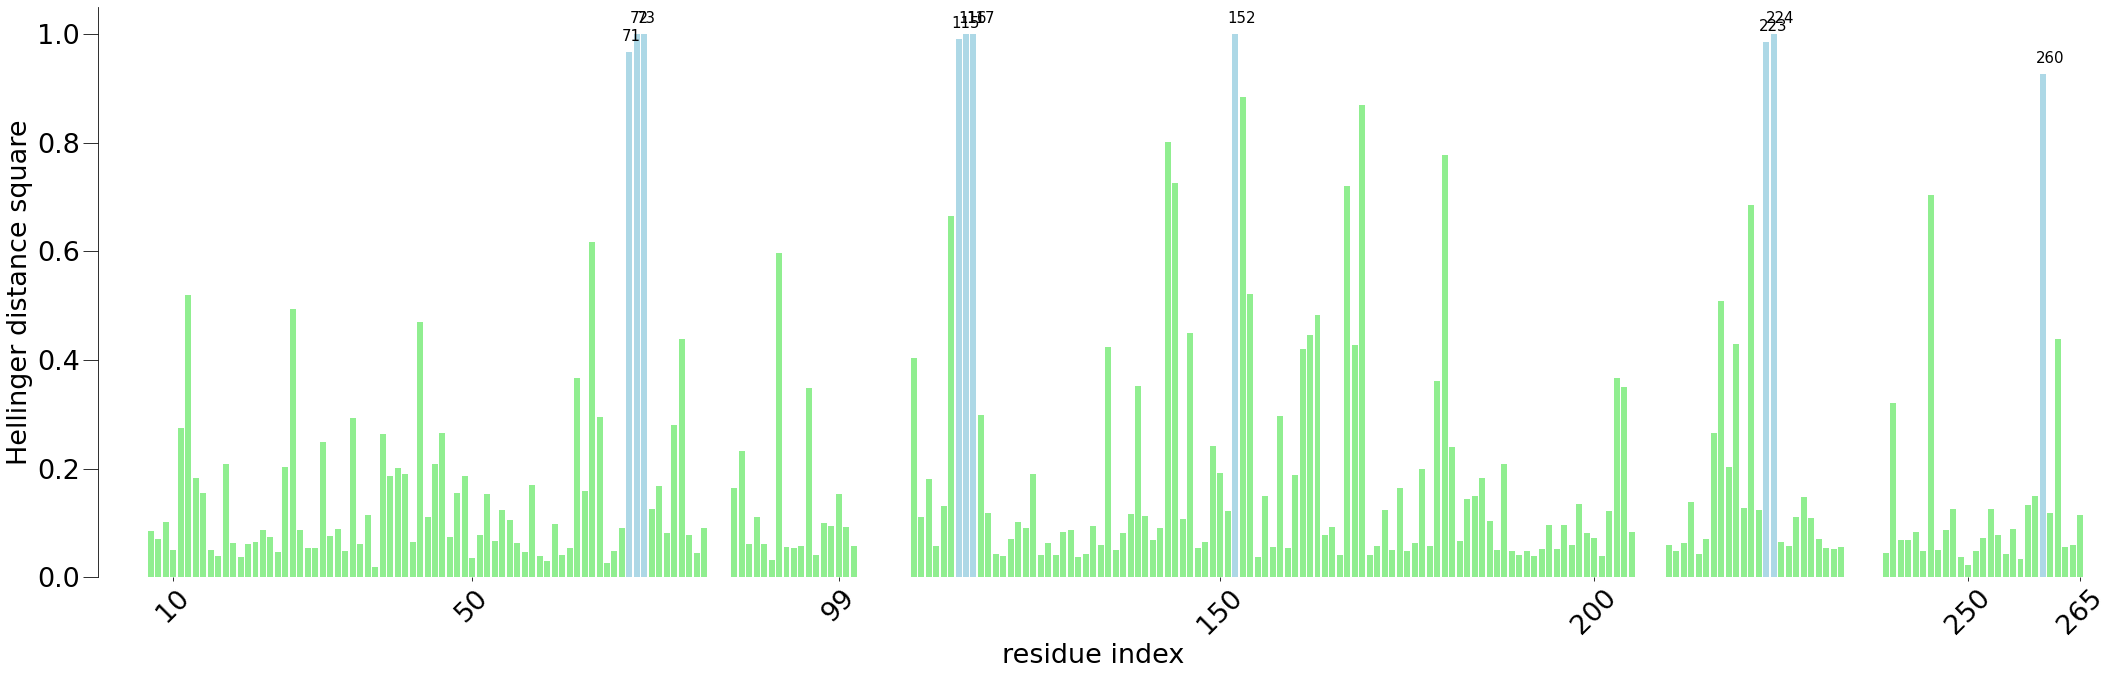

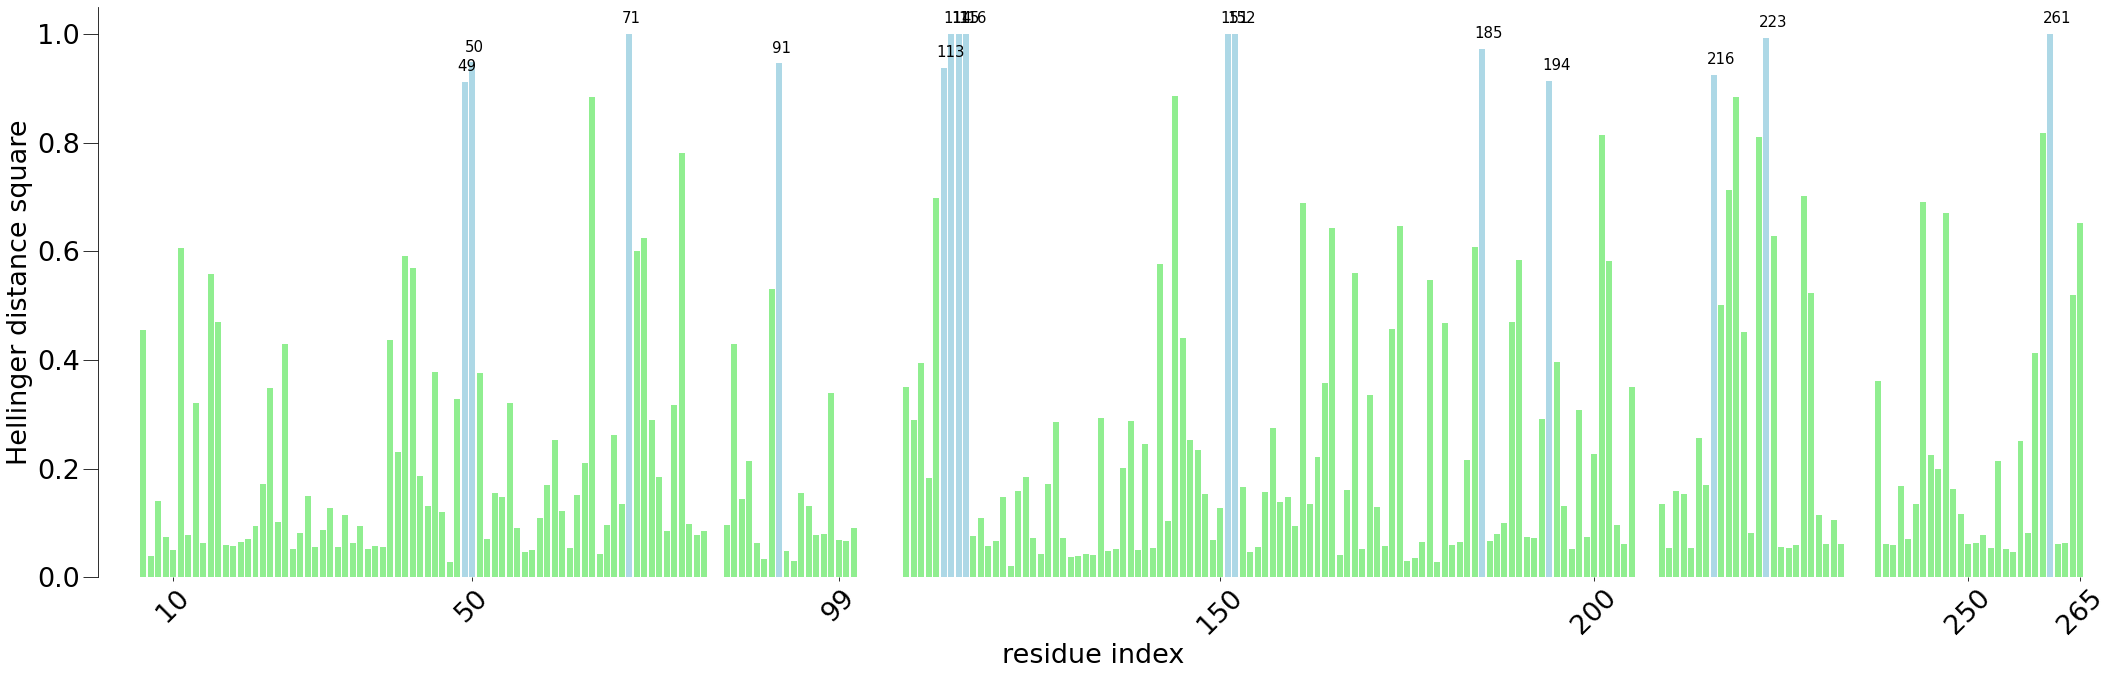

In [68]:
theta_hellinger = {}
eta_hellinger = {}
(theta_hellinger, eta_hellinger) = get_dist(functionname['hellinger'],hist_iso_theta, hist_iso_eta, hist_full_theta, hist_full_eta, theta_hellinger, eta_hellinger)
plot_distance(input_dict=theta_hellinger, x_label="residue index", 
               y_label="Hellinger distance square", figname="Hellinger_theta.png",cutoff=0.9)
plot_distance(input_dict=eta_hellinger, x_label="residue index", 
               y_label="Hellinger distance square", figname="Hellinger_eta.png",
               cutoff=0.9)

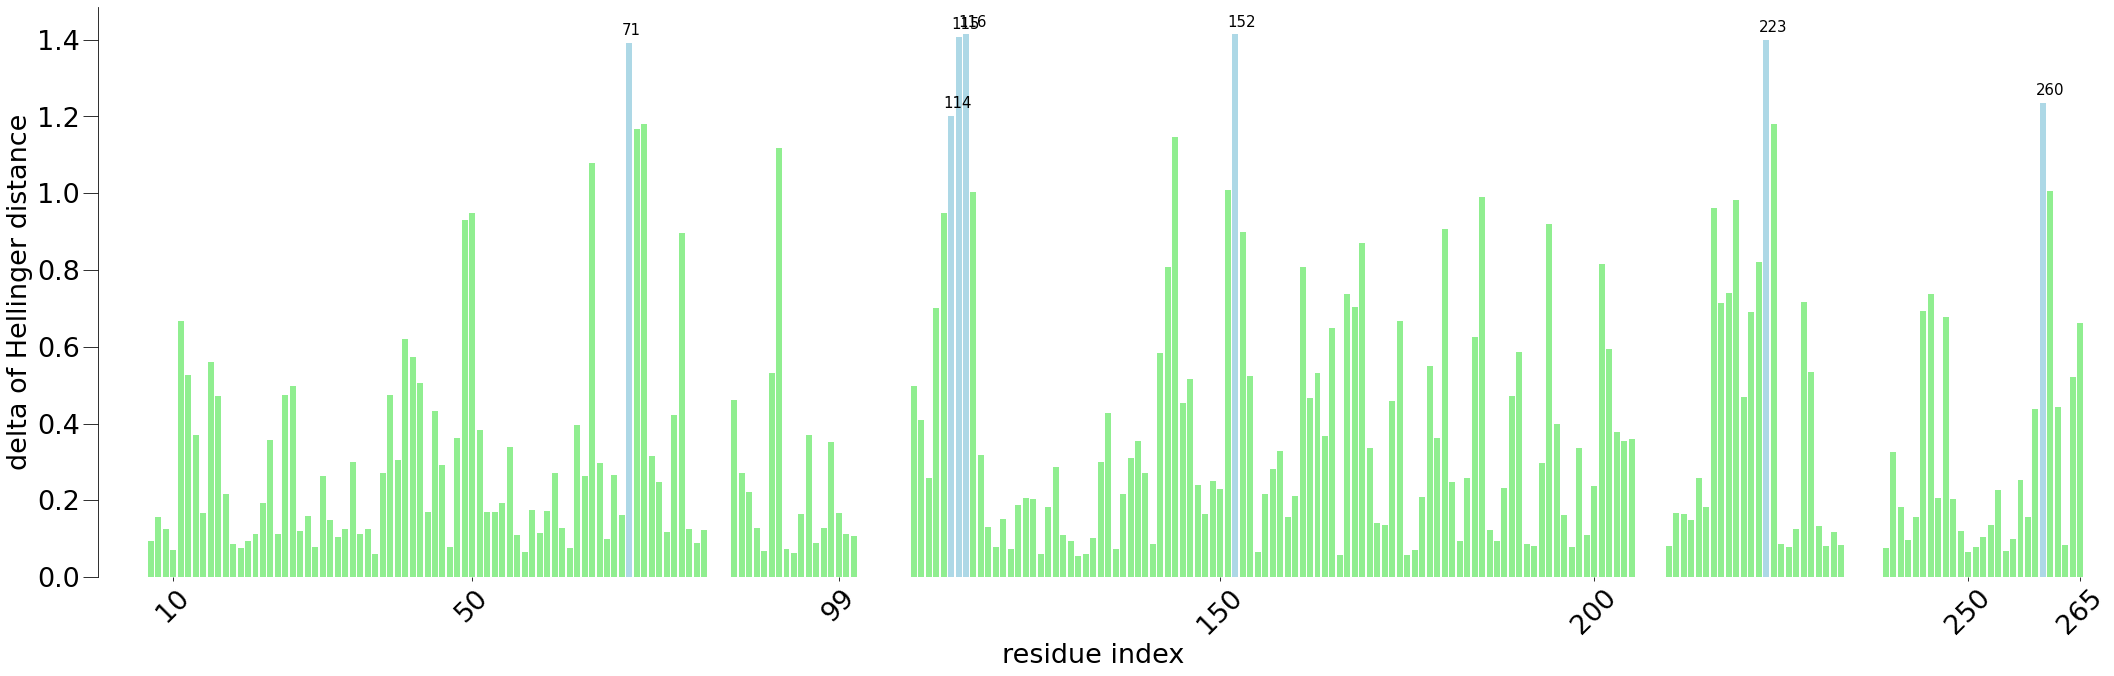

In [69]:
delta_hellinger = calc_delta(theta=theta_hellinger, eta=eta_hellinger)
plot_distance(input_dict=delta_hellinger, x_label="residue index", 
               y_label="delta of Hellinger distance", figname="Hellinger_delta.png",cutoff=1.2)

# get Bhattacharyya distance 

In [21]:
theta_Bhattacharyya = {}
eta_Bhattacharyya = {}
(theta_Bhattacharyya, eta_Bhattacharyya) = get_dist(functionname['Bha'],hist_iso_theta, hist_iso_eta, hist_full_theta, hist_full_eta, theta_Bhattacharyya, eta_Bhattacharyya)

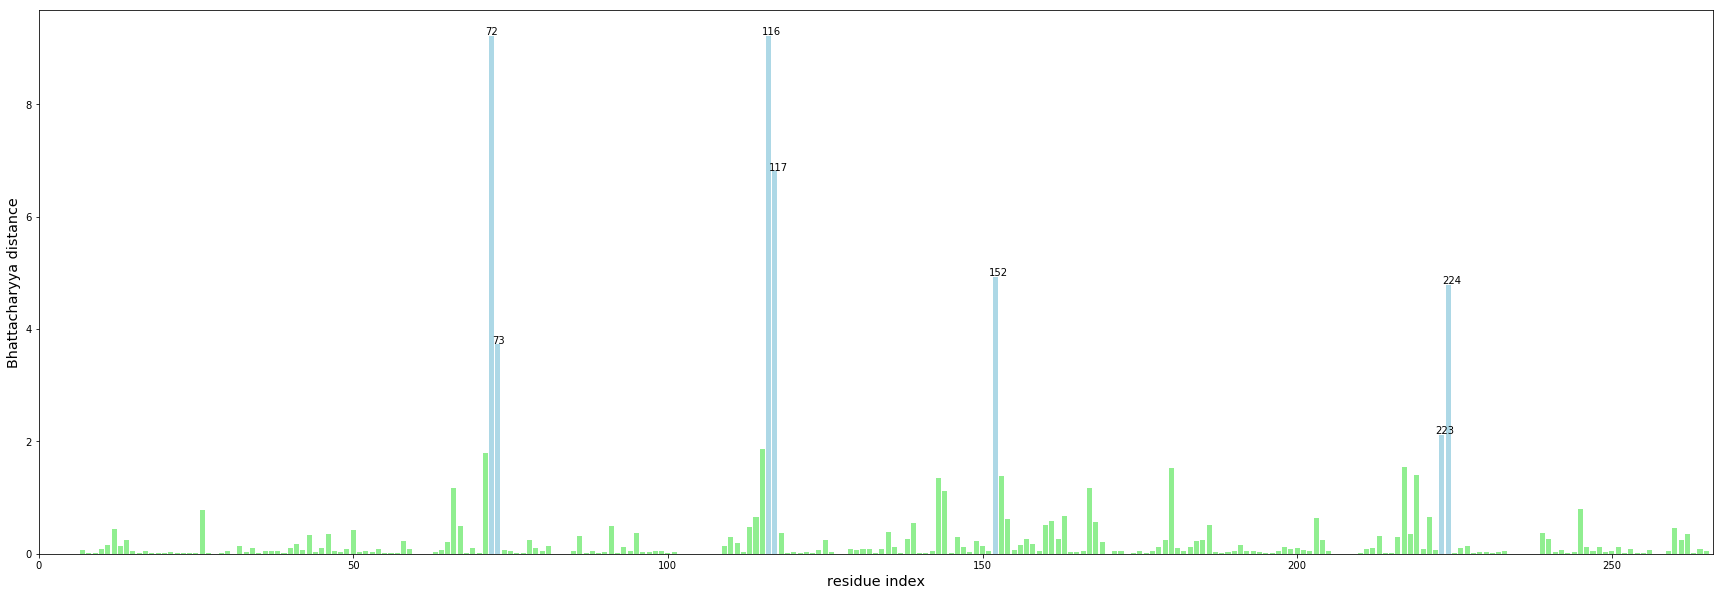

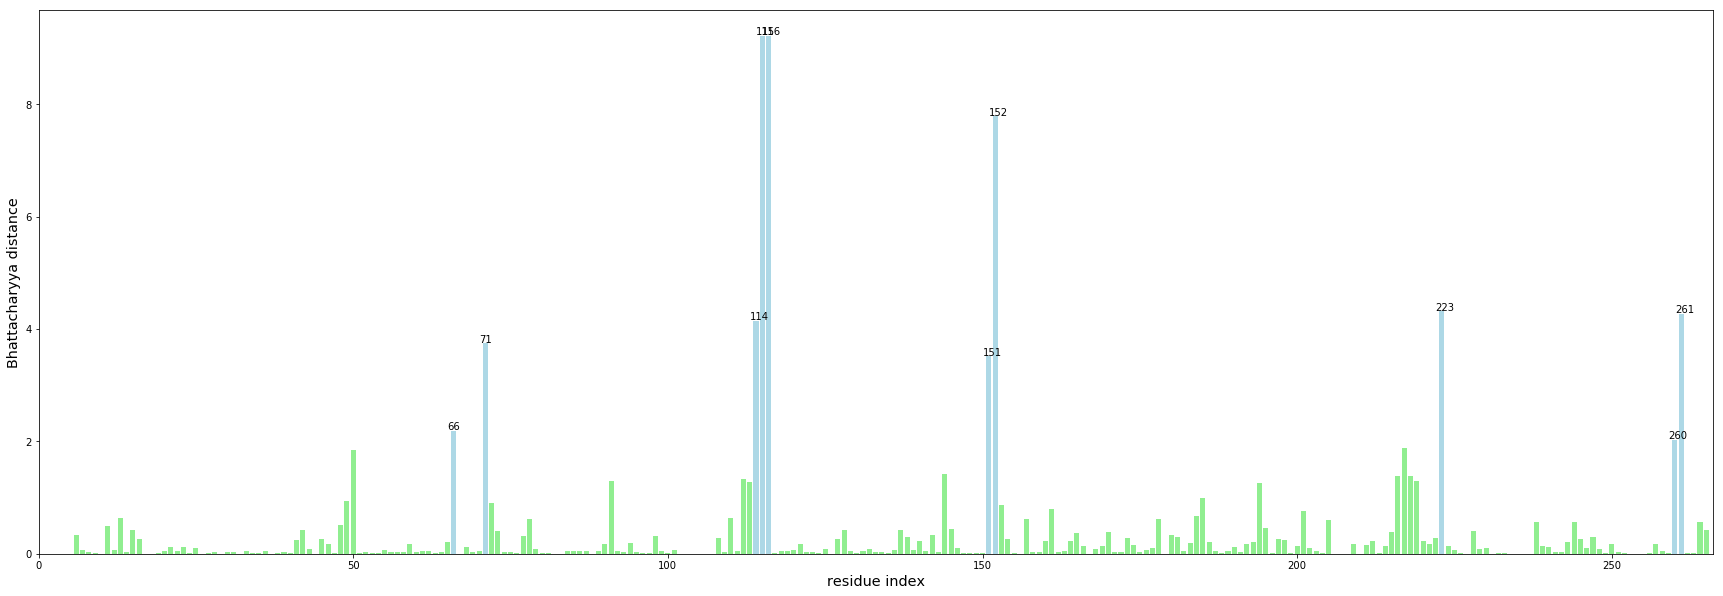

In [22]:
plot_distance(input_dict=theta_Bhattacharyya, x_label="residue index", 
               y_label="Bhattacharyya distance", figname="./plot/Bhattacharyya_theta.png",
              cutoff=2)
plot_distance(input_dict=eta_Bhattacharyya, x_label="residue index", 
               y_label="Bhattacharyya distance", figname="./plot/Bhattacharyya_eta.png",
               cutoff=2)

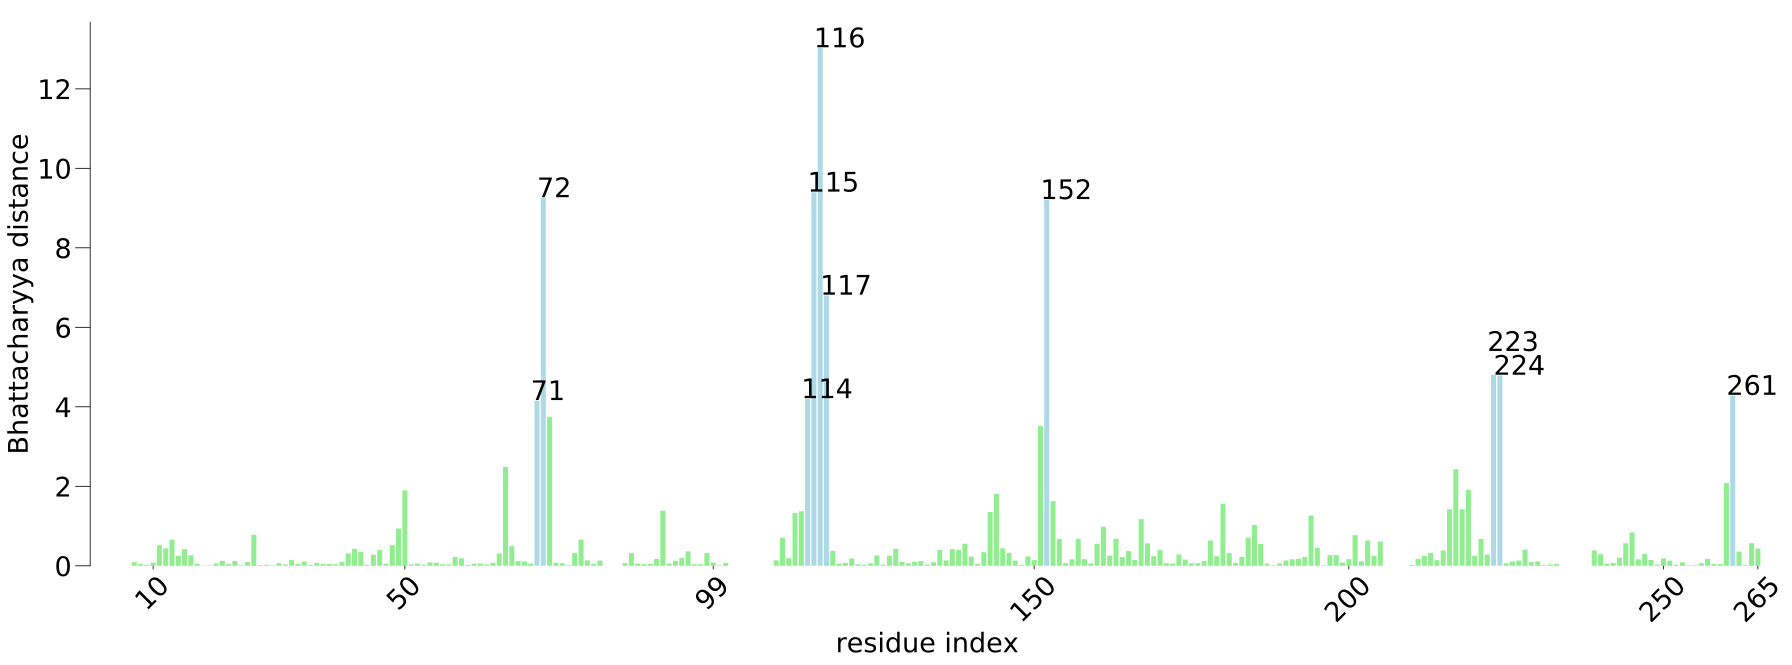

In [71]:
delta_Bha = calc_delta(theta=theta_Bhattacharyya, eta=eta_Bhattacharyya)
plot_distance(input_dict=delta_Bha, x_label="residue index", 
               y_label="Bhattacharyya distance", figname="./plot/Bhattacharyya_delta.png",cutoff=4)


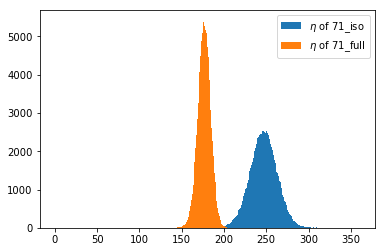

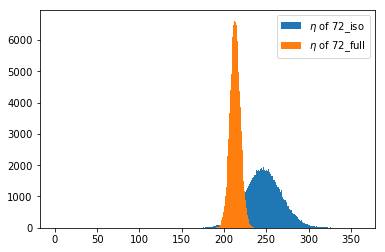

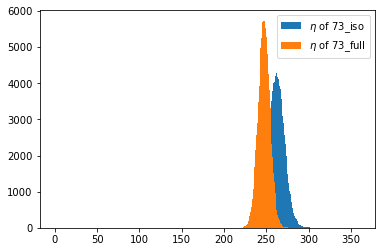

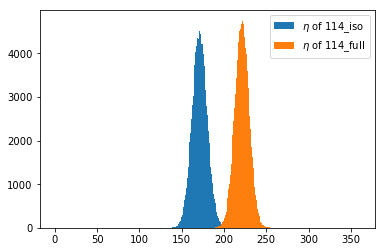

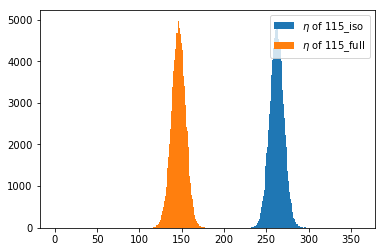

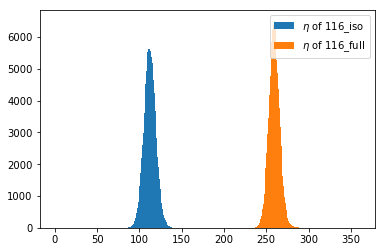

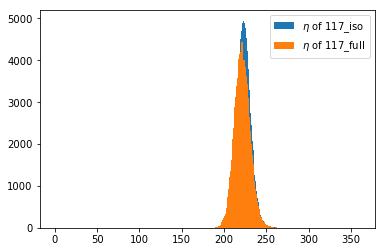

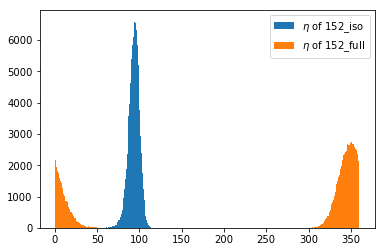

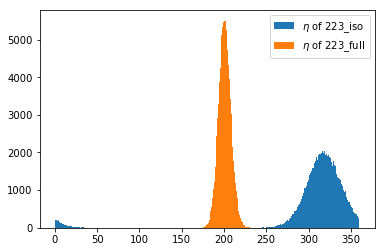

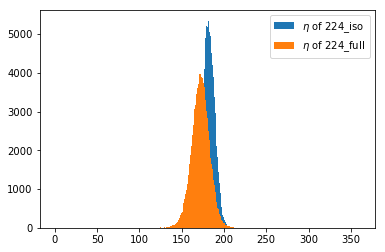

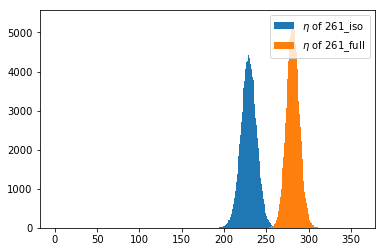

In [43]:
index = ['71', '72', '73', '114', '115', '116','117', '152', '223', '224', '261']
for ind in index:
    fig = plt.figure()
    plt.hist(iso_eta[ind], bins=360, range=(0, 360), label = '$\eta$ of %s_iso' %ind)
    plt.hist(full_eta[ind], bins=360, range=(0, 360), label = '$\eta$ of %s_full' %ind)
    plt.legend(loc = 'upper right')
#     plt.show()
    plt.savefig('./plot/%s.eta.png' %ind, dpi = 100)

# Calculate distance between either iso or full with flat distribution

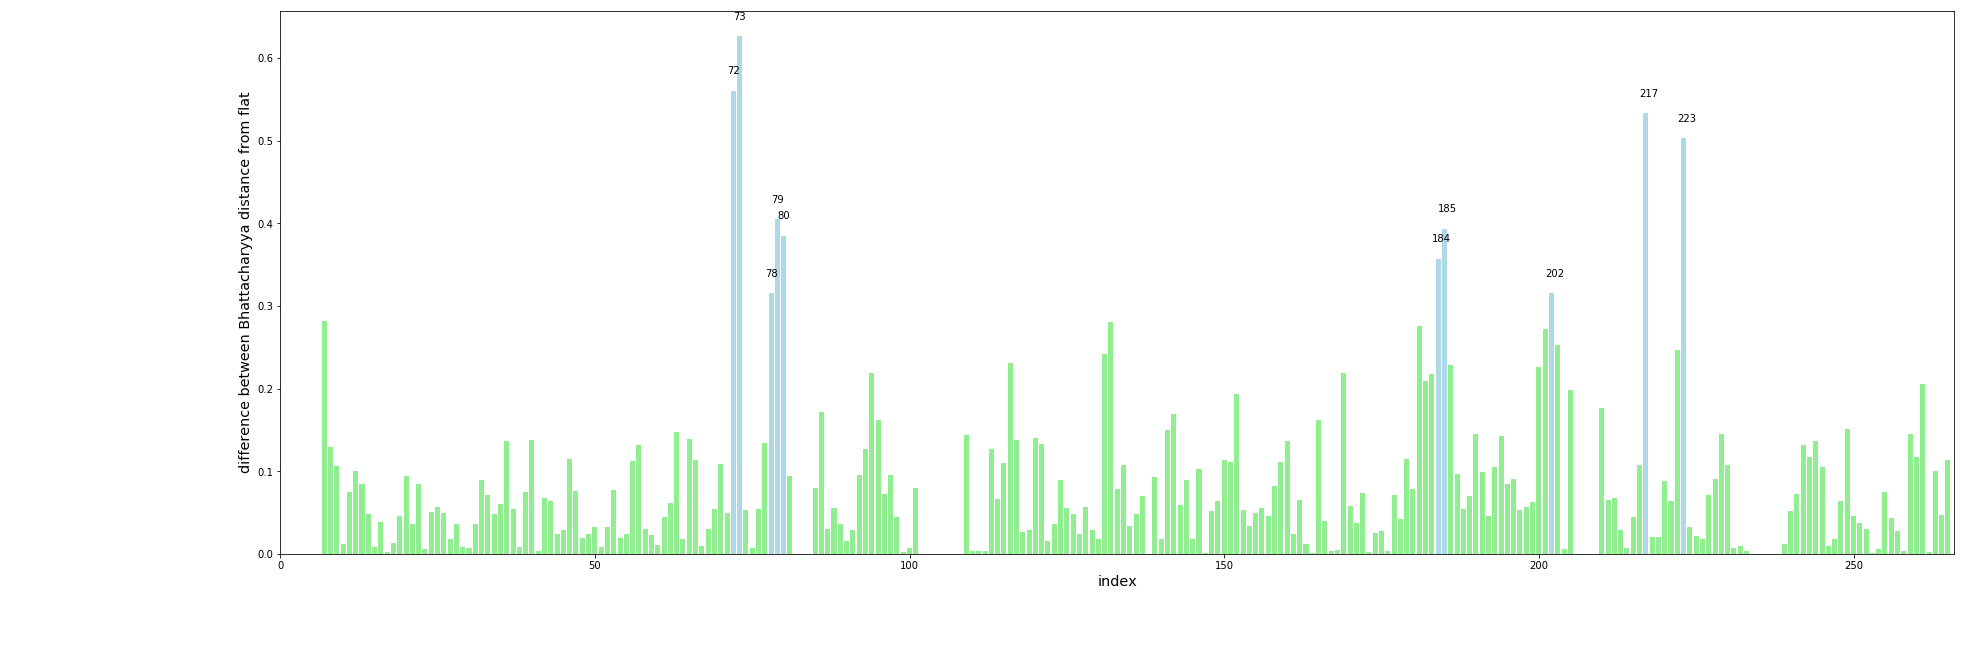

In [27]:
iso_theta_from_flat_Bha = {}
full_theta_from_flat_Bha = {}
iso_theta_from_flat_Bha = get_dist_from_flat(function=functionname['Bha'], input_hist=hist_iso_theta, out_hist=iso_theta_from_flat_Bha)
full_theta_from_flat_Bha = get_dist_from_flat(function=functionname['Bha'], input_hist=hist_full_theta, out_hist=full_theta_from_flat_Bha)

#plot_distance(figname='./plot/iso_theta_from_flat.png', input_dict=iso_theta_from_flat, x_label='index', y_label='Bhattacharyya distance from flat', cutoff=1)

diff_theta_Bha = {}
for i in iso_theta_from_flat_Bha:
    diff_theta_Bha[i] = abs(iso_theta_from_flat_Bha[i] - full_theta_from_flat_Bha[i])
plot_distance(figname='./plot/diff_theta_Bha_from_flat.png', input_dict=diff_theta_Bha, x_label='index', y_label='difference between Bhattacharyya distance from flat', cutoff=0.3)

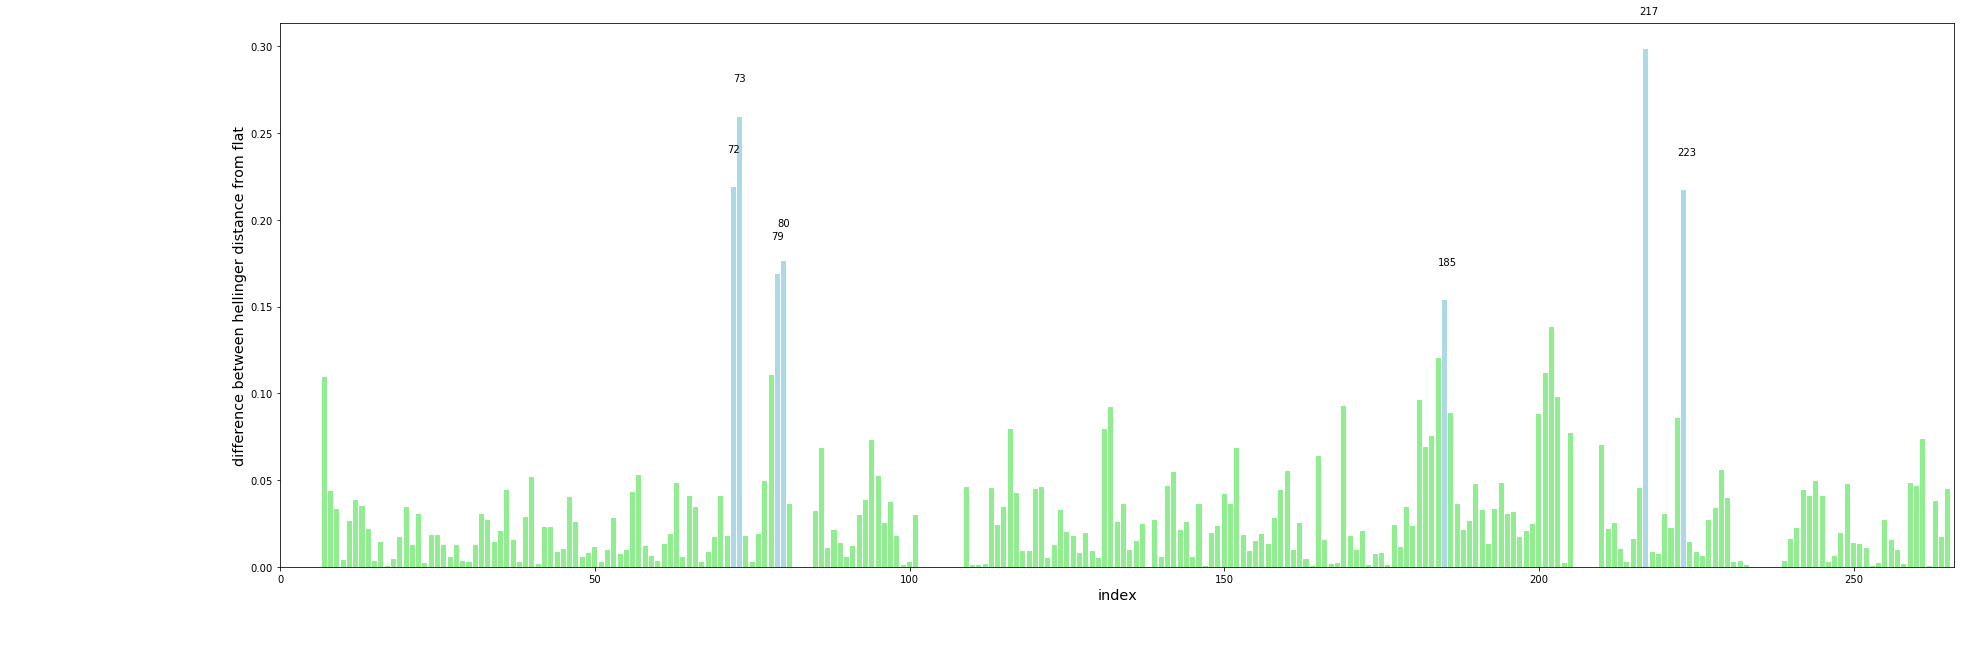

In [28]:
iso_theta_from_flat_He = {}
full_theta_from_flat_He = {}
iso_theta_from_flat_He = get_dist_from_flat(function=functionname['hellinger'], input_hist=hist_iso_theta, out_hist=iso_theta_from_flat_He)
full_theta_from_flat_He = get_dist_from_flat(function=functionname['hellinger'], input_hist=hist_full_theta, out_hist=full_theta_from_flat_He)

diff_theta_He = {}
for i in iso_theta_from_flat_He:
    diff_theta_He[i] = abs(iso_theta_from_flat_He[i] - full_theta_from_flat_He[i])
plot_distance(figname='./plot/diff_theta_He_from_flat.png', input_dict=diff_theta_He, x_label='index', y_label='difference between hellinger distance from flat', cutoff=0.15)

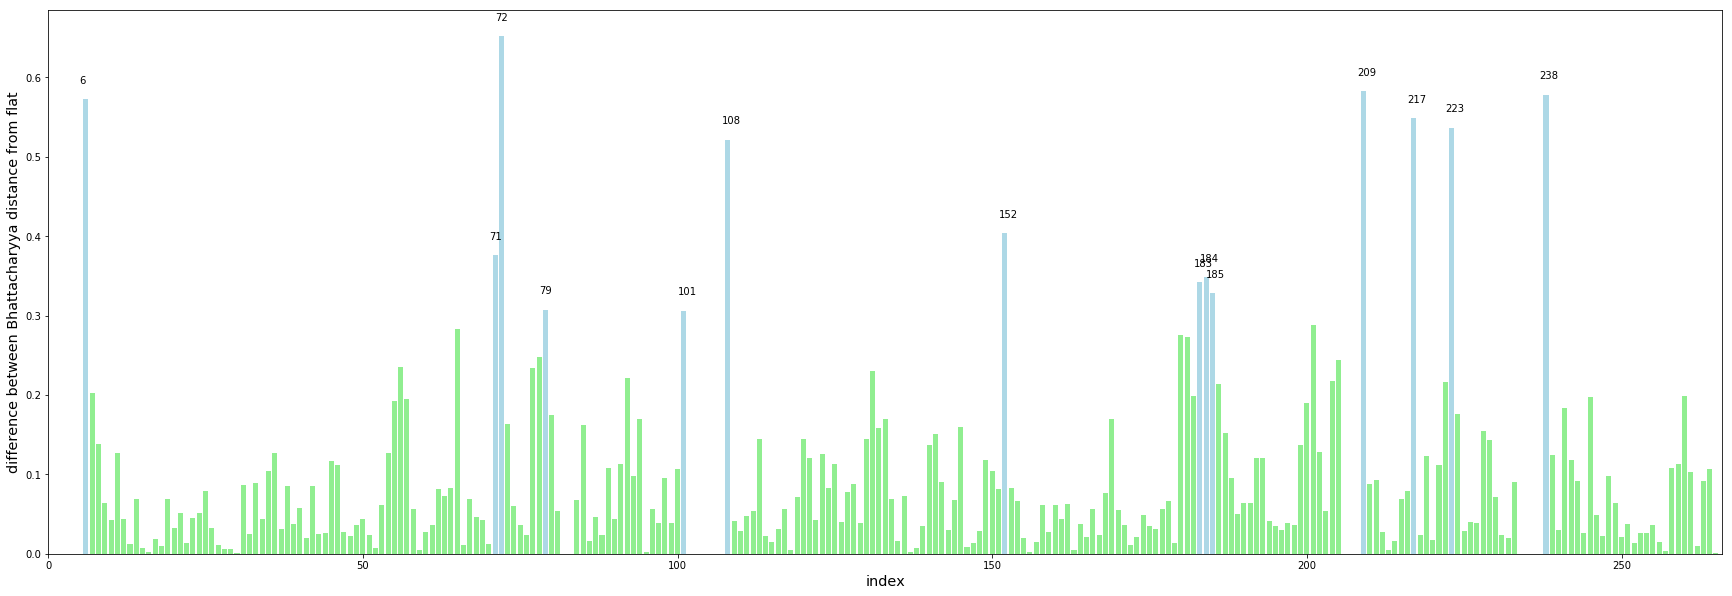

In [29]:
iso_eta_from_flat_Bha = {}
full_eta_from_flat_Bha = {}
iso_eta_from_flat_Bha = get_dist_from_flat(function=functionname['Bha'], input_hist=hist_iso_eta, out_hist=iso_eta_from_flat_Bha)
full_eta_from_flat_Bha = get_dist_from_flat(function=functionname['Bha'], input_hist=hist_full_eta, out_hist=full_eta_from_flat_Bha)

#plot_distance(figname='./plot/iso_theta_from_flat.png', input_dict=iso_theta_from_flat, x_label='index', y_label='Bhattacharyya distance from flat', cutoff=1)

diff_eta_Bha = {}
for i in iso_eta_from_flat_Bha:
    diff_eta_Bha[i] = abs(iso_eta_from_flat_Bha[i] - full_eta_from_flat_Bha[i])
plot_distance(figname='./plot/diff_eta_Bha_from_flat.png', input_dict=diff_eta_Bha, x_label='index', y_label='difference between Bhattacharyya distance from flat', cutoff=0.3)

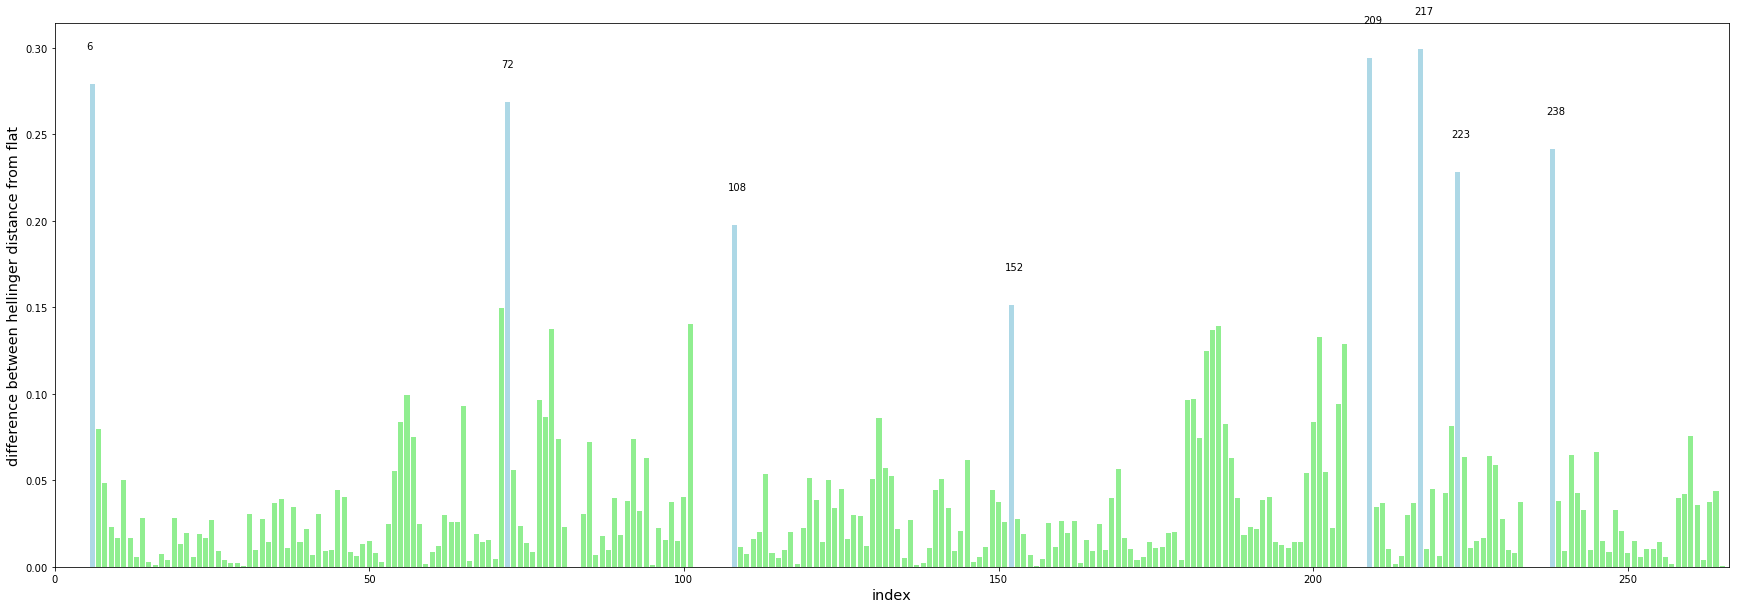

In [30]:
iso_eta_from_flat_He = {}
full_eta_from_flat_He = {}
iso_eta_from_flat_He = get_dist_from_flat(function=functionname['hellinger'], input_hist=hist_iso_eta, out_hist=iso_eta_from_flat_He)
full_eta_from_flat_He = get_dist_from_flat(function=functionname['hellinger'], input_hist=hist_full_eta, out_hist=full_eta_from_flat_He)

diff_eta_He = {}
for i in iso_eta_from_flat_He:
    diff_eta_He[i] = abs(iso_eta_from_flat_He[i] - full_eta_from_flat_He[i])
plot_distance(figname='./plot/diff_theta_He_from_flat.png', input_dict=diff_eta_He, x_label='index', y_label='difference between hellinger distance from flat', cutoff=0.15)

# Calculate Hellinger and Bhattacharyya distance from gaussian

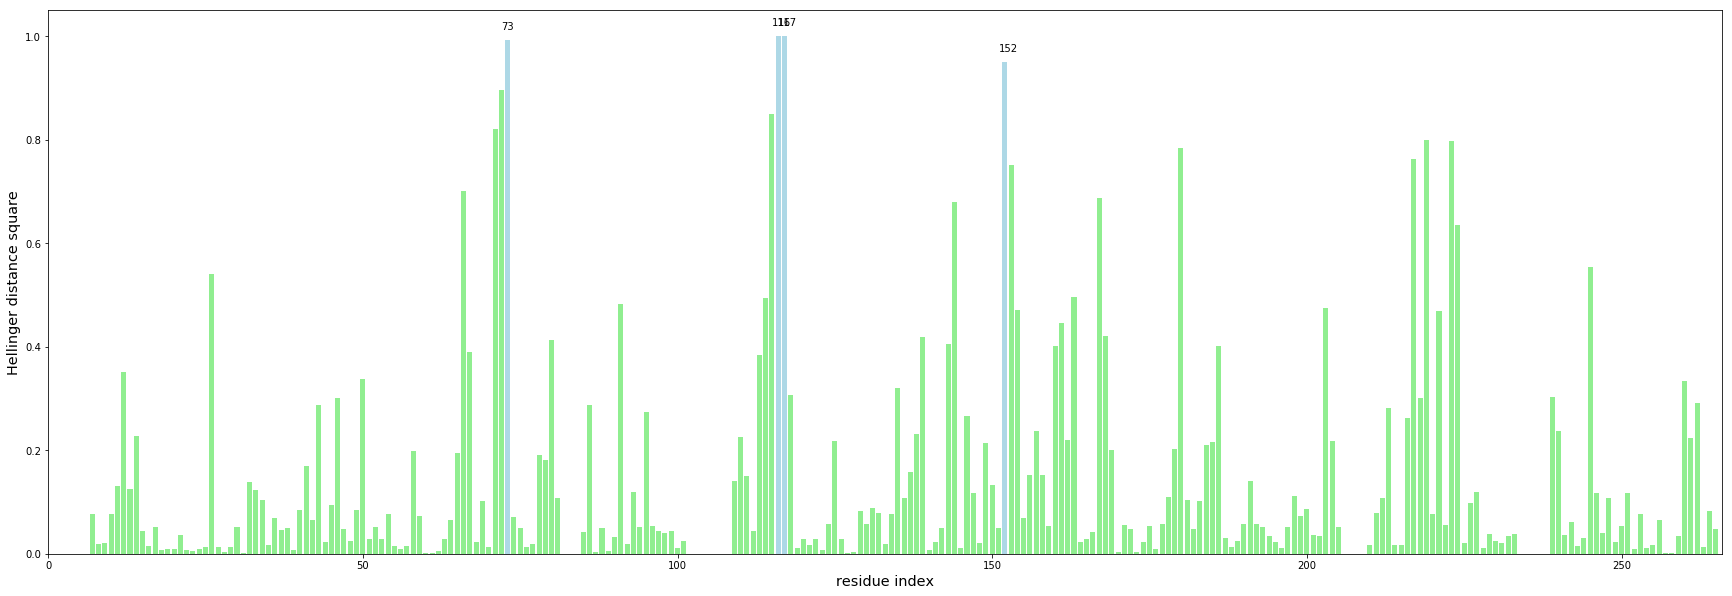

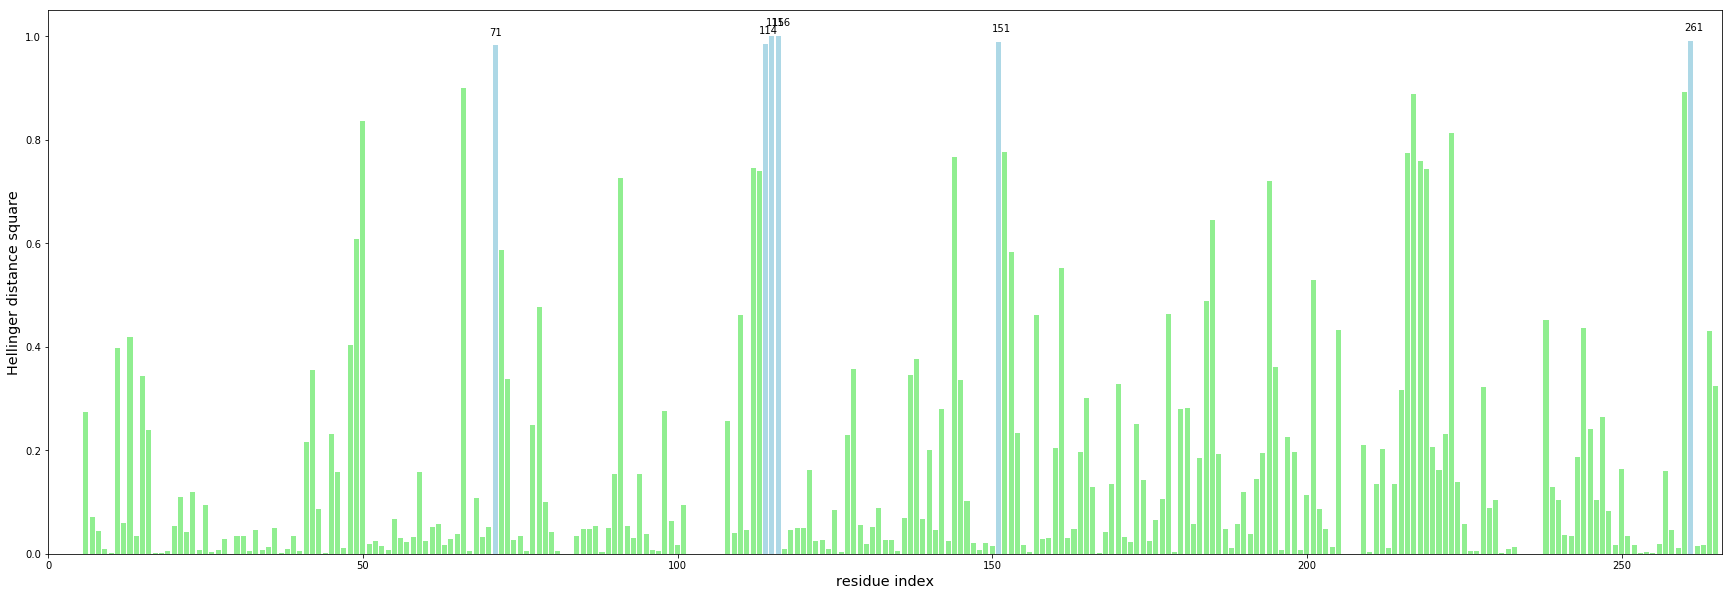

In [20]:
theta_hellinger_gauss = {}
eta_hellinger_gauss = {}
(theta_hellinger_gauss, eta_hellinger_gauss) = get_dist(functionname['he_gauss'], iso_theta, iso_eta, full_theta, full_eta, theta_hellinger_gauss, eta_hellinger_gauss)
plot_distance(input_dict=theta_hellinger_gauss, x_label="residue index", 
               y_label="Hellinger distance square", figname="./plot/Hellinger_theta_gauss.png",cutoff=0.9)
plot_distance(input_dict=eta_hellinger_gauss, x_label="residue index", 
               y_label="Hellinger distance square", figname="./plot/Hellinger_eta_gauss.png",
               cutoff=0.9)

delta_hellinger_gauss = calc_delta(theta=theta_hellinger_gauss, eta=eta_hellinger_gauss)
plot_distance(input_dict=delta_hellinger_gauss, x_label="residue index", 
               y_label="delta of Hellinger distance", figname="./plot/Hellinger_delta_gauss.png",cutoff=1.1)

theta_Bhattacharyya_gauss = {}
eta_Bhattacharyya_gauss = {}
(theta_Bhattacharyya_gauss, eta_Bhattacharyya_gauss) = get_dist(functionname['Bha_gauss'],iso_theta, iso_eta, full_theta, full_eta, theta_Bhattacharyya_gauss, eta_Bhattacharyya_gauss)
plot_distance(input_dict=theta_Bhattacharyya_gauss, x_label="residue index", 
               y_label="Bhattacharyya distance", figname="./plot/Bhattacharyya_theta_gauss.png",
              cutoff=2)
plot_distance(input_dict=eta_Bhattacharyya_gauss, x_label="residue index", 
               y_label="Bhattacharyya distance", figname="./plot/Bhattacharyya_eta_gauss.png",
               cutoff=2)

delta_Bha_gauss = calc_delta(theta=theta_Bhattacharyya_gauss, eta=eta_Bhattacharyya_gauss)
plot_distance(input_dict=delta_Bha_gauss, x_label="residue index", 
               y_label="delta of Bhattacharyya distance", figname="./plot/Bhattacharyya_delta_gauss.png",cutoff=2)